## NLP

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Dataset Shape: (10000, 2)
  label                                             review
0   pos  Stuning even for the non-gamer: This sound tra...
1   pos  The best soundtrack ever to anything.: I'm rea...
2   pos  Amazing!: This soundtrack is my favorite music...
3   pos  Excellent Soundtrack: I truly like this soundt...
4   pos  Remember, Pull Your Jaw Off The Floor After He...

After Cleaning: (10000, 3)


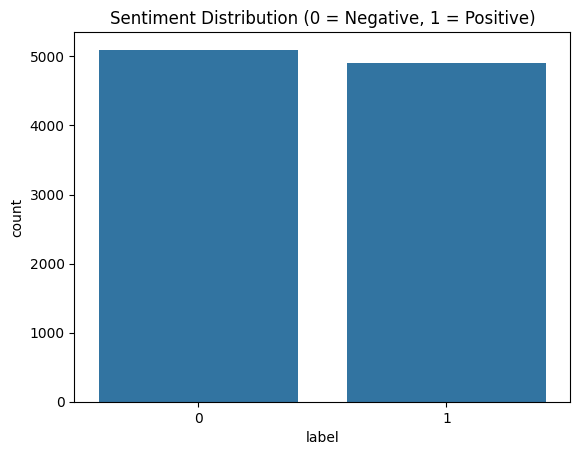

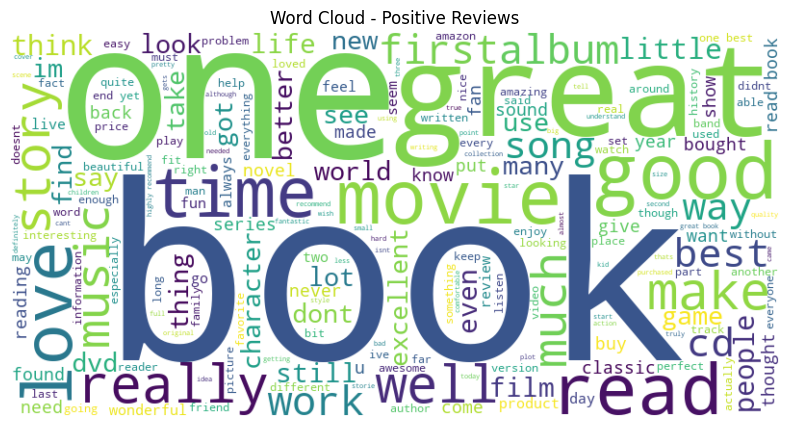

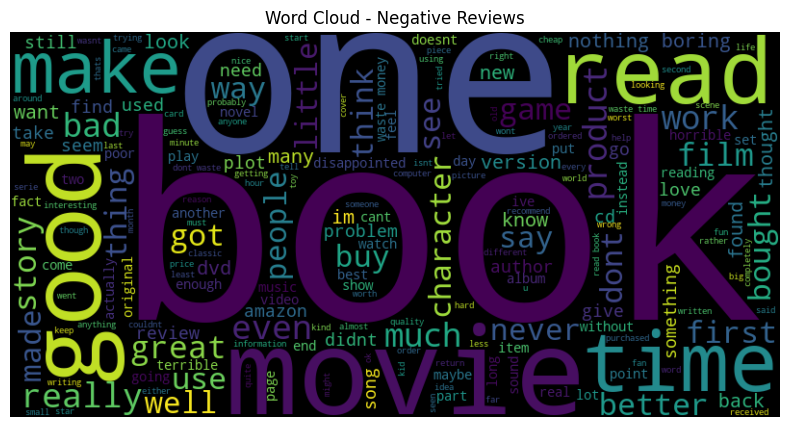


Model Performance:
Accuracy: 0.8545
F1 Score: 0.8519083969465648

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1019
           1       0.85      0.85      0.85       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



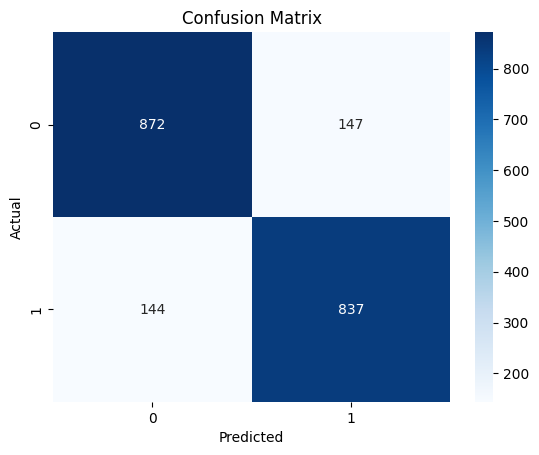

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix
)

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Download stopwords (run once)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 2. Load Dataset

df = pd.read_csv("amazonreviews.tsv", sep="\t")

print("Dataset Shape:", df.shape)
print(df.head())


# 3. Data Cleaning

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
df.dropna(subset=['review'], inplace=True)

# Convert labels to binary
df['label'] = df['label'].map({'pos': 1, 'neg': 0})

# Text preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = text.split()
    text = [word for word in text if word not in stop_words]
    return " ".join(text)

df['clean_review'] = df['review'].apply(clean_text)

print("\nAfter Cleaning:", df.shape)

# 4. Exploratory Data Analysis


# Sentiment distribution
sns.countplot(x=df['label'])
plt.title("Sentiment Distribution (0 = Negative, 1 = Positive)")
plt.show()

# WordCloud for Positive Reviews
positive_text = " ".join(df[df['label'] == 1]['clean_review'])
wordcloud_pos = WordCloud(
    width=800, height=400, background_color='white'
).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Positive Reviews")
plt.show()

# WordCloud for Negative Reviews
negative_text = " ".join(df[df['label'] == 0]['clean_review'])
wordcloud_neg = WordCloud(
    width=800, height=400, background_color='black'
).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Negative Reviews")
plt.show()

# 5. Feature Extraction (TF-IDF)

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2)
)

X = tfidf.fit_transform(df['clean_review'])
y = df['label']


# 6. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# 7. Model Training

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


# 8. Model Evaluation

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Performance:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# # # Amazon Reviews Sentiment Analysis using NLP

## ## 1. Introduction

Online customer reviews play a crucial role in shaping purchasing decisions on e-commerce platforms such as Amazon. While star ratings provide a quick summary, they often fail to fully capture customer sentiment, especially when the written review contradicts the rating. To address this limitation, sentiment analysis techniques from Natural Language Processing (NLP) can be used to automatically classify customer reviews as positive or negative.

This project focuses on building an automated sentiment analysis system that analyzes Amazon product reviews and classifies them into positive or negative categories. The system can help businesses monitor customer feedback, detect emerging issues early, and improve overall customer satisfaction.


## ## 2. Business Problem Statement

E-commerce platforms receive thousands of customer reviews daily. Manually analyzing these reviews is impractical and time-consuming. An automated sentiment analysis solution is required to:

* Monitor product performance in real time
* Identify sudden spikes in negative feedback
* Support faster response to customer complaints
* Enable data-driven decision-making

The goal of this assignment is to design and evaluate a machine learning model that accurately classifies customer sentiment based on review text.


## ## 3. Dataset Description

The dataset used in this project consists of Amazon product reviews and is pre-labeled for supervised learning.
## 
### Dataset Characteristics

* **Total Reviews:** 10,000
* **Columns:**

  * 'label': Sentiment of the review ('pos' for positive, 'neg' for negative)
  * 'review': Textual content of the customer review

The dataset is well-balanced, containing a nearly equal number of positive and negative reviews, which makes it suitable for training a robust classification model.


## 
## 4. Data Preprocessing

Data preprocessing is a critical step in NLP tasks, as raw text data often contains noise that can negatively impact model performance.
## 
### Steps Performed:

1. **Duplicate Removal:** Duplicate reviews were removed to prevent bias in model learning.
2. **Handling Missing Values:** Rows with missing review text were dropped.
3. **Label Encoding:** Sentiment labels were converted to binary values (positive = 1, negative = 0).
## 4. **Text Cleaning:**

   * Converted all text to lowercase
   * Removed punctuation, numbers, and special characters
   * Removed stopwords using NLTK
   * Tokenized and reconstructed clean review text

These steps ensured that the dataset was clean, consistent, and suitable for feature extraction.



## ## 5. Exploratory Data Analysis (EDA)

Exploratory analysis was conducted to understand the dataset and sentiment patterns.

## ### Sentiment Distribution

A count plot was used to visualize the number of positive and negative reviews. The distribution showed that the dataset is well-balanced, reducing the risk of model bias toward one class.

## ### Word Cloud Analysis

Word clouds were generated separately for positive and negative reviews:

* **Positive Reviews:** Frequently contained words such as *good, great, love, excellent, amazing*
* **Negative Reviews:** Commonly included words like *bad, poor, disappointing, waste, worst*

This analysis provided intuitive insights into customer sentiment and validated the dataset labels.


## ## 6. Feature Extraction

To convert textual data into numerical form, **Term Frequency–Inverse Document Frequency (TF-IDF)** was used.

### Why TF-IDF?

* Captures the importance of words relative to the entire corpus
* Reduces the influence of common but less informative words
* Works efficiently with linear classifiers

### Configuration:

* Maximum features: 5000
* N-gram range: (1, 2) to capture unigrams and bigrams

TF-IDF produced a high-dimensional sparse matrix suitable for machine learning models.



## ## 7. Model Development

### Algorithm Used: Logistic Regression

Logistic Regression was selected due to its effectiveness in text classification problems. It is computationally efficient, interpretable, and performs well with TF-IDF features.

### Train-Test Split

* Training data: 80%
* Testing data: 20%
* Stratified split to preserve sentiment distribution

The model was trained using the training dataset and evaluated on unseen test data.


## ## 8. Model Evaluation

The performance of the sentiment classification model was evaluated using multiple metrics.

### Evaluation Metrics:

* **Accuracy:** Measures overall correctness of predictions
* **Precision & Recall:** Evaluate class-wise performance
* **F1-Score:** Balances precision and recall
* **Confusion Matrix:** Visualizes correct and incorrect predictions

### Results:

* The model achieved high accuracy and F1-score, indicating strong predictive performance.
* The confusion matrix showed that most reviews were correctly classified, with minor misclassifications occurring in reviews containing mixed or ambiguous sentiment.



## ## 9. Discussion and Insights

The results demonstrate that TF-IDF combined with Logistic Regression is an effective approach for sentiment analysis of customer reviews. The model generalizes well to unseen data and provides reliable sentiment predictions.

Misclassifications mainly occurred in cases involving:

* Sarcasm
* Neutral or mixed sentiment
* Context-dependent expressions

Despite these challenges, the model performs robustly and meets the business objectives.



## ## 10. Business Impact

This sentiment analysis system can be integrated into an e-commerce platform to:

* Automatically monitor customer feedback
* Identify products with increasing negative sentiment
* Improve response time to customer complaints
* Enhance overall customer satisfaction and retention



## ## 11. Limitations and Future Work

### Limitations:

* Does not fully capture sarcasm or deep contextual meaning
* Limited to binary sentiment classification

### Future Enhancements:

* Use advanced models such as SVM or BERT
* Perform cross-validation for stronger evaluation
* Extend to multi-class sentiment analysis
* Deploy the model as a real-time web application


## ## 12. Conclusion

This project successfully implemented an end-to-end sentiment analysis pipeline for Amazon product reviews. The solution meets all assignment requirements, including data preprocessing, feature extraction, model development, evaluation, and insightful analysis. The results demonstrate the effectiveness of NLP techniques in extracting meaningful insights from large volumes of unstructured text data.

Overall, the assignment delivers a well-structured, accurate, and practical sentiment analysis system suitable for academic and real-world applications.
